In [58]:
import numpy as np
import matplotlib as mpl
import pandas as pd
import gc
import pickle
import matplotlib.pyplot as plt
from __future__ import print_function
mpl.rcParams['figure.figsize'] = (18, 12)

#import numpy as np


# Read cleaned data
Start here if data has been saved, and/or restart kernel to save memory

In [33]:
%%time
goodv = np.load('goodv.npy')

goodc = np.load('goodc.npy')

goodl = np.load('goodl.npy')

with open('goodk.pkl', 'rb') as f:
    goodk = pickle.load(f)


CPU times: user 1.7 s, sys: 8.48 s, total: 10.2 s
Wall time: 33.9 s


[643 107 971 438 980 578 562  75 445 483]
[ 31255.45758533  24965.76741121  16259.54380924  14436.5511106
  14163.61369077  11631.37521621  10680.05379698  10037.88544354
   8884.6820433    8335.51470742]


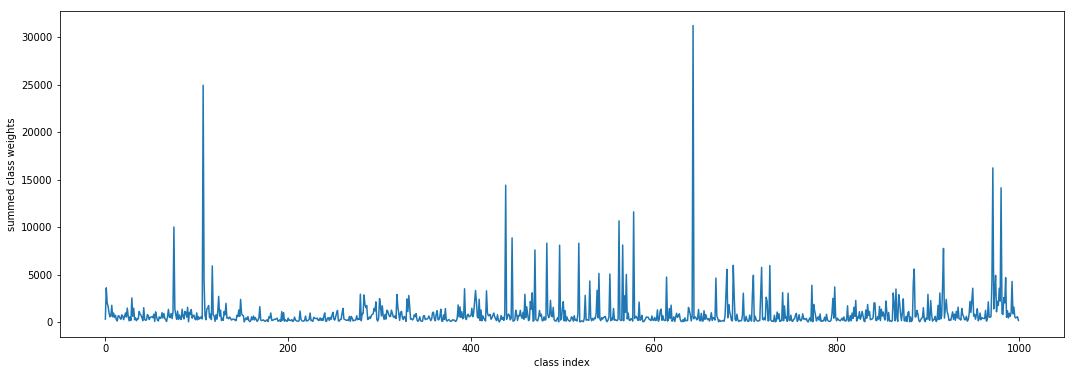

In [34]:
# look at classes

classsum = np.sum(goodc,axis=0)
plt.plot(classsum)
plt.xlabel('class index')
plt.ylabel('summed class weights')

#sorted_classes = classsum[np.argsort(classsum)]

lastn = np.flipud(np.argsort(classsum))

# find the 10 most populous classes
print(lastn[0:10])
print(classsum[lastn[0:10]])





In [35]:
# let's only consider the n most populous classes. Let's segregate the data vectors by these classes:

# can do this faster using fancy indexing, but let's loop here

# find the indexes of the n most

class_i = []

for cindex in lastn[0:10]:
    indexes = np.where(goodc[:,cindex]> 0.6)
    class_i.append(indexes[0])

for indexes in class_i:
    print(len(indexes))
    
#OK these seem a little sparse, but OK

2452
1226
1087
269
836
536
283
989
3677
822


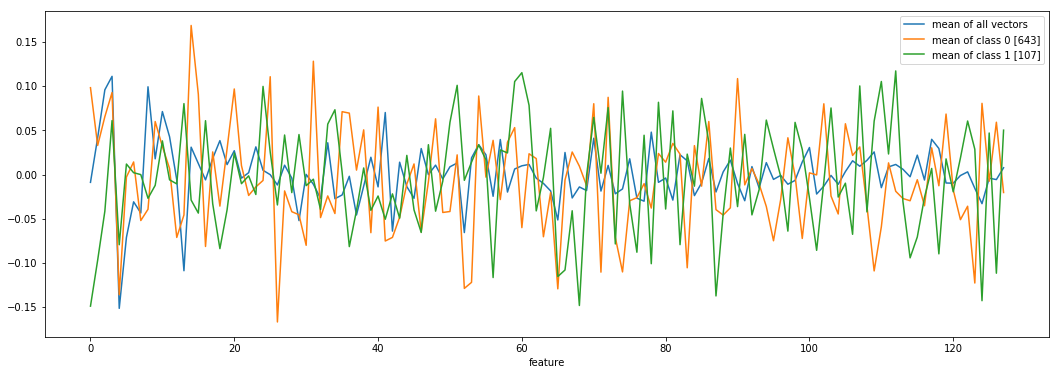

In [30]:
plt.plot(np.mean(goodv,axis=0),label='mean of all vectors')
plt.plot(np.mean(goodv[class_i[0],:],axis=0),label='mean of class 0 [643]')
plt.plot(np.mean(goodv[class_i[1],:],axis=0),label='mean of class 1 [107]')
plt.xlabel('feature')
plt.legend()

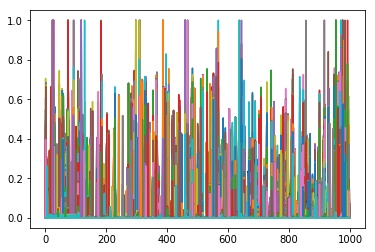

In [6]:
import matplotlib.pyplot as plt
plt.plot(np.transpose(goodc[30000:40000,:]));

(array([14]),)
(array([0]),)


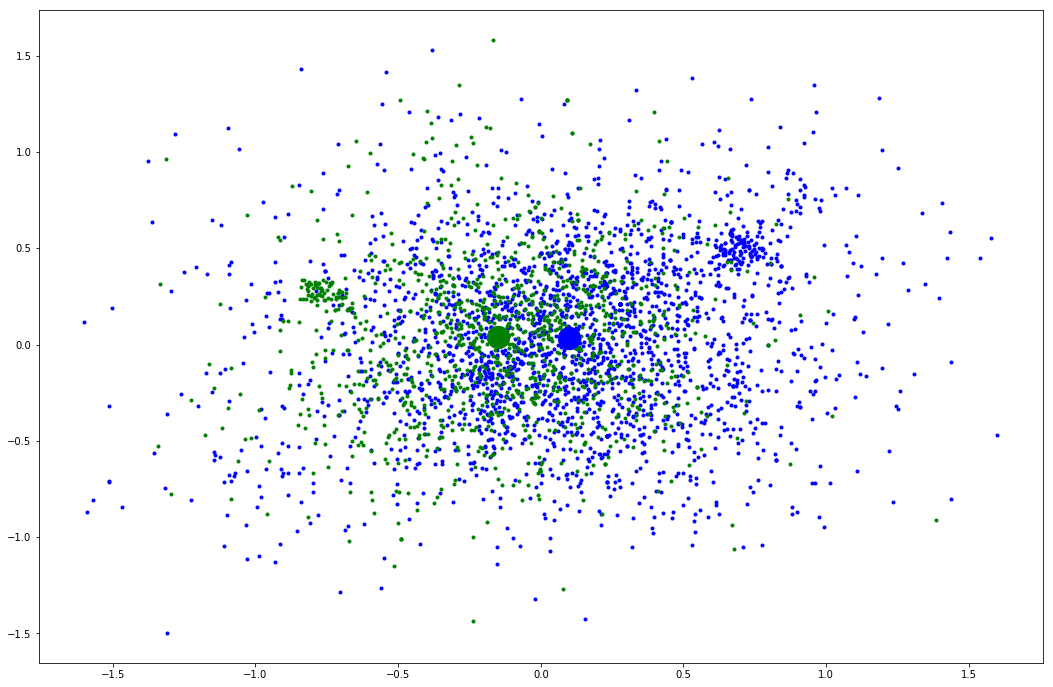

In [81]:
# scatterplot some dimensions to see clusters if any

# find max dimensions in two most populated classes

mean0 = np.mean(goodv[class_i[0],:],axis=0)
mean1 = np.mean(goodv[class_i[1],:],axis=0)
mean3 = np.mean(goodv[class_i[3],:],axis=0)
print(np.where(np.absolute(mean0) == np.max(np.absolute(mean0))))
print(np.where(np.absolute(mean1) == np.max(np.absolute(mean1))))

plt.plot(goodv[class_i[0],0],goodv[class_i[0],10],'.',color='b')
plt.plot(goodv[class_i[1],0],goodv[class_i[1],10],'.',color='g')
plt.scatter(np.mean(goodv[class_i[1],0]),np.mean(goodv[class_i[1],10]), marker='o', s=500,color='g',zorder=3)
plt.scatter(np.mean(goodv[class_i[0],0]),np.mean(goodv[class_i[0],10]), marker='o', s=500,color='b',zorder=3)
plt.show()

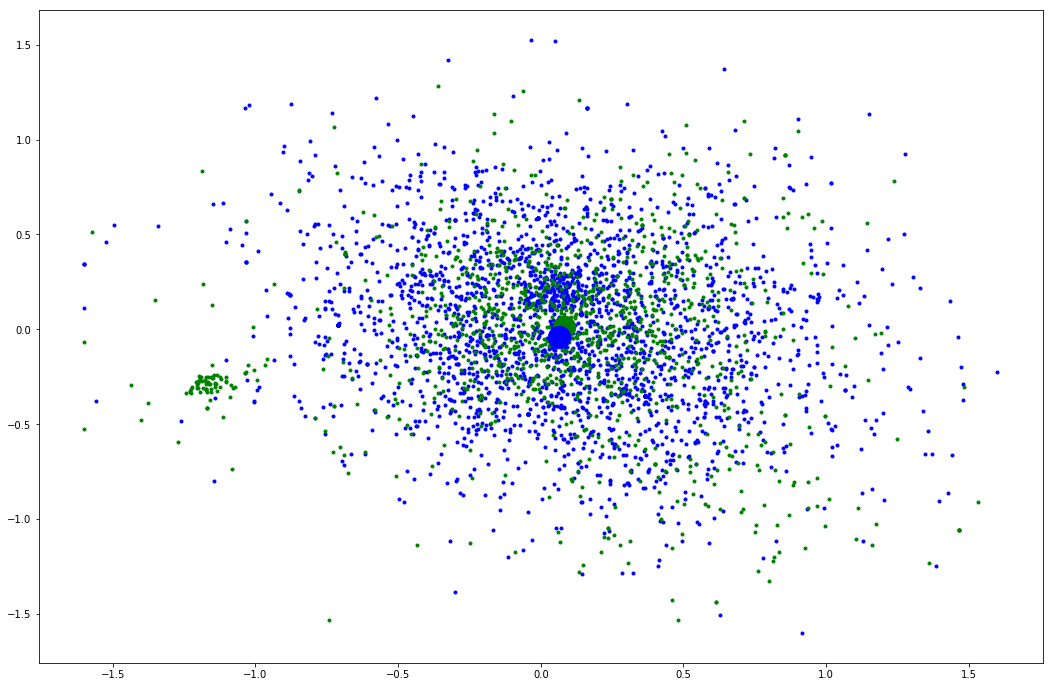

In [98]:
# scatterplot some dimensions to see clusters if any
def scatterit(goodv, class_0, class_1, dim0, dim1):
    plt.figure()
    plt.plot(goodv[class_0,dim0],goodv[class_0,dim1],'.',color='b')
    plt.plot(goodv[class_1,dim0],goodv[class_1,dim1],'.',color='g')
    plt.scatter(np.mean(goodv[class_0,dim0]),np.mean(goodv[class_0,dim1]), marker='o', s=500,color='g',zorder=3)
    plt.scatter(np.mean(goodv[class_1,dim0]),np.mean(goodv[class_1,dim1]), marker='o', s=500,color='b',zorder=3)
    plt.show()
    
    
scatterit(goodv, class_i[0],class_i[1],70, 80)

In [4]:
print np.sum(labels[0,:])
print np.sum(labels[:,1])
print np.argwhere(np.isnan(labels))
#print np.max(labels,axis=1)

SyntaxError: invalid syntax (<ipython-input-4-b1a9b94fb2c3>, line 1)

In [ ]:
print np.sum(goodl[0,:])
print np.sum(goodl[:,1])
print np.argwhere(np.isnan(labels))
#print np.max(labels,axis=1)

In [ ]:
#df = pd.DataFrame(np.random.randn(8, 4), index=dates, columns=['A', 'B', 'C', 'D'])
df = pd.DataFrame({"A": [1, 2], "B": [3.0, 4.5]})
#foo = df.values[columns=df.columns[1:]]
foo = df['A'].values
print foo

print type(df)
print type(gb)

In [ ]:
#http://www.apnorton.com/blog/2016/12/19/Visualizing-Multidimensional-Data-in-Python/

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs

from pandas.tools.plotting import parallel_coordinates

In [ ]:
X, y = make_blobs(n_samples=200, centers=3, n_features=3, random_state=0)
plt.scatter(X[:,0], X[:,2], c=y)
plt.show()

In [ ]:

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
cols =  ['Class', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols', 
         'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity', 
         'Hue', 'OD280/OD315', 'Proline']
data = pd.read_csv(url, names=cols)

y = data['Class']          # Split off classifications
X = data.loc[:, 'Alcohol':] # Split off features

In [ ]:
data = pd.read_csv('iris.csv', names=['sepal_length','sepal_width','petal_length','petal_width','species'])

In [ ]:
iris =  np.loadtxt('iris-num.csv', skiprows=1,delimiter=',')
print iris.shape

In [ ]:
y=iris[:,4]
plt.scatter(iris[:,0], iris[:,1], c=y)

In [36]:
#https://www.kdnuggets.com/2018/08/introduction-t-sne-python.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time


In [ ]:
irises = pd.read_csv('iris.csv', skiprows=1, names=['sepal_length','sepal_width','petal_length','petal_width','species'])

In [ ]:

pd.set_option('display.max_columns', None) # Show All Columns in Preview
display(gb.head(n=5))

In [ ]:
gb.read_hdf('ganimages.hdf')

In [ ]:
#decimate data so we don't run out of memory:

dfsmall = gb.iloc[[0::1000], [1, 7, 8]]

display(gbsmall.head(n=5))

In [ ]:
foo = gb.values
print foo.shape

In [ ]:
pd.set_option('display.max_columns', None) # Show All Columns in Preview
display(irises.head(n=5))


In [ ]:
display(pd.crosstab(index=irises['species'], columns='count'))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
feat_cols =
pca_result = pca.fit_transform(df[feat_cols].values)